## Loading libraries and data.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,gc

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('./restaurant-revenue-prediction/train.csv') 
test = pd.read_csv('./restaurant-revenue-prediction/test.csv') 

In [5]:
print(train.shape,test.shape)

(137, 43) (100000, 42)


1. We have just 137 rows to train the model.
2. The test data is pretty huge compared to the train data.

## Preprocessing and EDA

In [105]:
train.head(n=10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,5,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,3,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,2,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,4,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,3,0,1,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,5,0,2,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,5,0,2,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,4,1,2,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,5,1,2,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227.0


1. The target column is 'revenue'.
2. Dataset is anonymised.
3. This is a regression problem.

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null int64
City Group    137 non-null int64
Type          137 non-null int64
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-null i

Here,
1. There are no missing values.
2. We have 4 categorical columns.

In [7]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


Text(0, 0.5, 'Number of Restaurants')

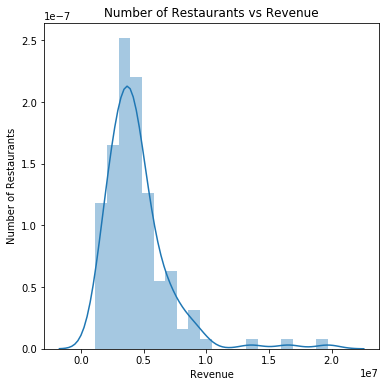

In [21]:
plt.subplots(figsize=(6,6))
sns.distplot(train['revenue'], kde=True, bins=20)
plt.title('Number of Restaurants vs Revenue')
plt.xlabel('Revenue')
plt.ylabel('Number of Restaurants')

Most restaurant generate revenue between 0.25e7 to 0.5e7. Now, let's see how the city affects the restaurant's revenue,

In [17]:
train['City'].nunique()

34

Text(0, 0.5, 'No of restaurants')

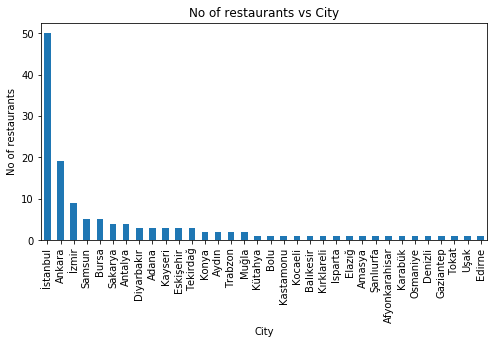

In [24]:
plt.subplots(figsize=(8,4))
train['City'].value_counts().plot(kind='bar')
plt.title('No of restaurants vs City')
plt.xlabel('City')
plt.ylabel('No of restaurants')

1. Istanbul has the maximum number of restaurants.
2. Second is Ankara and then Izimir.
3. Rest of the cities has less than 10 restaurants.

Text(0, 0.5, 'Mean Revenue Generated')

<Figure size 576x288 with 0 Axes>

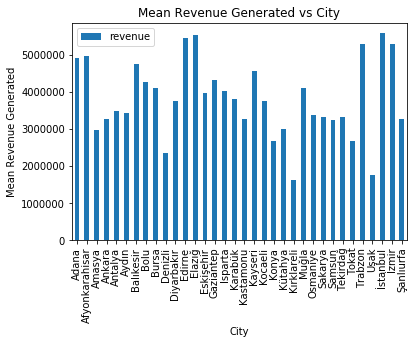

In [42]:
train[['City','revenue']].groupby('City').mean().plot(kind='bar')
plt.title('Mean Revenue Generated vs City')
plt.xlabel('City')
plt.ylabel('Mean Revenue Generated')

Here, 
1. Mean Revenue Generated is over 5M for a few cities.
2. MRG is between 2M to 4M for most cities.
3. It is less than 2M for just 2 cities.

We can't use label encoding on this column,it will mislead the model.We can bin the cities based on Mean Revenue Generated.

Now let's see the CIty Group column.

In [100]:
mean_revenue_per_city = train[['City', 'revenue']].groupby('City', as_index=False).mean()
mean_revenue_per_city['revenue'] = mean_revenue_per_city['revenue'].apply(lambda x: int(x/1e6)) 
mean_revenue_per_city

mean_dict = dict(zip(mean_revenue_per_city.City, mean_revenue_per_city.revenue))
mean_dict

{'Adana': 4,
 'Afyonkarahisar': 4,
 'Amasya': 2,
 'Ankara': 3,
 'Antalya': 3,
 'Aydın': 3,
 'Balıkesir': 4,
 'Bolu': 4,
 'Bursa': 4,
 'Denizli': 2,
 'Diyarbakır': 3,
 'Edirne': 5,
 'Elazığ': 5,
 'Eskişehir': 3,
 'Gaziantep': 4,
 'Isparta': 4,
 'Karabük': 3,
 'Kastamonu': 3,
 'Kayseri': 4,
 'Kocaeli': 3,
 'Konya': 2,
 'Kütahya': 2,
 'Kırklareli': 1,
 'Muğla': 4,
 'Osmaniye': 3,
 'Sakarya': 3,
 'Samsun': 3,
 'Tekirdağ': 3,
 'Tokat': 2,
 'Trabzon': 5,
 'Uşak': 1,
 'İstanbul': 5,
 'İzmir': 5,
 'Şanlıurfa': 3}

In [104]:
train.replace({"City":mean_dict}, inplace=True)

In [43]:
train['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

Text(0.5, 1.0, 'No of Restaurants vs City Group')

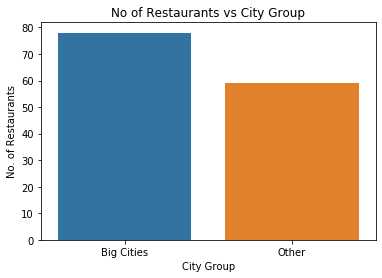

In [47]:
sns.countplot(train['City Group'])
plt.ylabel('No. of Restaurants')
plt.title('No of Restaurants vs City Group')

The number of restaurants located in Big Cities is more.

Text(0.5, 1.0, 'Mean Revenue Generated vs City Group')

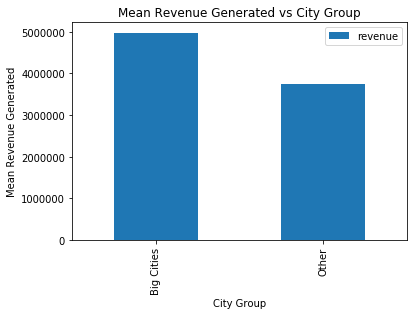

In [51]:
train[['City Group', 'revenue']].groupby('City Group').mean().plot(kind='bar')
plt.ylabel('Mean Revenue Generated')
plt.title('Mean Revenue Generated vs City Group')

Mean revenue generated by restaurants in 'Big Cities' is close to 5M whereas in 'Other' cities it is close to 4M. We can use label encoding on this column.

In [53]:
lr = LabelEncoder()
train['City Group'] = lr.fit_transform(train['City Group']
test['City Group'] = lr.transform(test['City Group'])

Now the 'Type' column.

In [64]:
train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

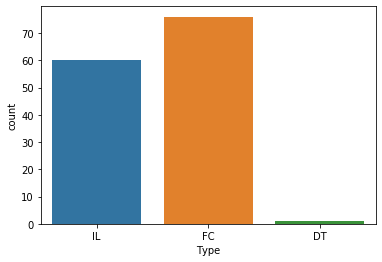

In [67]:
sns.countplot(train['Type'])

Here,
1. We have three types of restaurants, but in the test set another type 'MB' is present. We'll have to fit the label encoder on the test data.

Text(0.5, 1.0, 'Mean Revenue per Type')

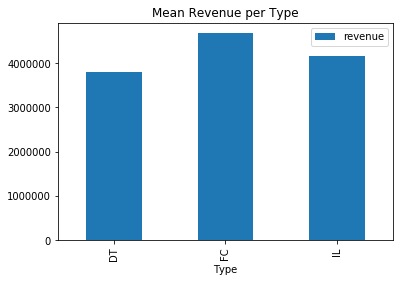

In [71]:
train[['Type', 'revenue']].groupby('Type').mean().plot(kind='bar')
plt.title('Mean Revenue per Type')

In [73]:
test['Type'] = lr.fit_transform(test['Type'])
train['Type'] = lr.transform(train['Type'])

Now, only 'Open Date' categorical column is left. We'll ignore it for now.

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null int64
City Group    137 non-null int64
Type          137 non-null int64
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-null i

In [ ]:
sns.pairplot(train)